In [15]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Generate synthetic data (Credit card transactions scenario)

In [2]:
# Step 1: Generate synthetic data (Credit card transactions scenario)
# Generating 100 normal transactions (2 features: 'amount', 'transaction_frequency') and 10 fraudulent transactions
np.random.seed(42)

## Normal transactions

In [2]:
# Normal transactions: Amounts around $50, and frequency of transactions between 1 to 5 times per day
normal_transactions = np.random.normal(loc=50, scale=10, size=(100, 2))  # 100 normal transactions
normal_transactions

array([[42.51558272, 30.67050036],
       [58.67965998, 54.70548638],
       [64.2575938 , 65.10661976],
       [61.54021178, 39.96200949],
       [40.98677554, 43.07443724],
       [45.07650821, 67.98111864],
       [49.87877416, 46.43433614],
       [40.77101235, 44.89158071],
       [47.99134582, 38.90615224],
       [43.21841822, 42.75265439],
       [39.4776818 , 66.63768239],
       [63.1510037 , 44.99313077],
       [65.22242561, 52.12842921],
       [57.6770797 , 59.45804808],
       [58.95134781, 53.78178978],
       [49.14989523, 60.74252921],
       [59.01828051, 62.30197856],
       [49.1833464 , 57.64281646],
       [51.26869678, 52.70734765],
       [43.91808546, 58.39076624],
       [44.19942301, 48.60637267],
       [32.18089676, 43.70980726],
       [34.52003249, 35.39734387],
       [56.7998694 , 51.37637806],
       [50.98230816, 48.84505483],
       [58.23167652, 33.88954629],
       [70.70194293, 54.02077049],
       [72.89062636, 34.44499303],
       [50.71174306,

## Fraudulent transactions

In [3]:
# Fraudulent transactions: Randomly large amounts and high frequency (outliers)
fraudulent_transactions = np.random.uniform(low=500, high=5000, size=(10, 2))  # 10 fraudulent transactions
fraudulent_transactions

array([[ 719.02606135, 2606.0627212 ],
       [3377.72762716, 4778.06449906],
       [3707.28217917, 2518.8625941 ],
       [4821.7938596 ,  982.22671479],
       [4795.00274222, 1663.22931445],
       [2051.59093997, 4474.08812537],
       [1734.20344593, 1803.96015665],
       [4280.58087274, 4685.58682596],
       [1848.55638838,  779.2817027 ],
       [3715.31620934,  923.12088931]])

## Combined dataset (normal + fraudulent)

In [4]:

# Combine normal and fraudulent transactions
# The first 100 rows are normal transactions, and the last 10 rows are fraudulent transactions
X = np.vstack([normal_transactions, fraudulent_transactions])

In [5]:
X

array([[  42.51558272,   30.67050036],
       [  58.67965998,   54.70548638],
       [  64.2575938 ,   65.10661976],
       [  61.54021178,   39.96200949],
       [  40.98677554,   43.07443724],
       [  45.07650821,   67.98111864],
       [  49.87877416,   46.43433614],
       [  40.77101235,   44.89158071],
       [  47.99134582,   38.90615224],
       [  43.21841822,   42.75265439],
       [  39.4776818 ,   66.63768239],
       [  63.1510037 ,   44.99313077],
       [  65.22242561,   52.12842921],
       [  57.6770797 ,   59.45804808],
       [  58.95134781,   53.78178978],
       [  49.14989523,   60.74252921],
       [  59.01828051,   62.30197856],
       [  49.1833464 ,   57.64281646],
       [  51.26869678,   52.70734765],
       [  43.91808546,   58.39076624],
       [  44.19942301,   48.60637267],
       [  32.18089676,   43.70980726],
       [  34.52003249,   35.39734387],
       [  56.7998694 ,   51.37637806],
       [  50.98230816,   48.84505483],
       [  58.23167652,   

In [6]:
dimensions = X.shape
rows, columns = dimensions

print("Rows:", rows)
print("Columns:", columns)

Rows: 110
Columns: 2


# True labels

In [7]:
# True labels (0: Normal, 1: Fraudulent)
y_true = np.array([0]*100 + [1]*10)  # 100 normal, 10 fraudulent
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
y_true_dimensions = y_true.shape
y_true_dimensions

(110,)

# Isolation Forest for Anomaly Detection

In [9]:
# Step 2: Fit Isolation Forest for anomaly detection
model = IsolationForest(contamination=0.1, random_state=42)
model

IsolationForest(contamination=0.1, random_state=42)

In [10]:
# Explanation of IsolationForest parameters

print("=== CONTAMINATION PARAMETER ===")
print("The 'contamination' parameter specifies the expected proportion of outliers in the dataset.")
print(f"In our model: contamination=0.1 means we expect 10% of the data to be anomalies/outliers.")
print(f"With {len(X)} total transactions, this means the model expects {int(len(X) * 0.1)} fraudulent transactions.")
print(f"Our actual fraudulent transactions: {sum(y_true)} out of {len(y_true)}")
print(f"Actual contamination rate: {sum(y_true)/len(y_true):.1%}")
print()

print("=== RANDOM_STATE PARAMETER ===")
print("The 'random_state' parameter controls the randomness of the algorithm.")
print("- IsolationForest uses random sampling to build isolation trees")
print("- Setting random_state=42 ensures reproducible results")
print("- Every time you run the code, you'll get the same predictions")
print("- Without random_state, results would vary between runs")
print()

print("=== WHY THESE VALUES? ===")
print("• contamination=0.1: Matches our synthetic data (10 fraudulent out of 110 total)")
print("• random_state=42: Common choice for reproducibility (42 is arbitrary but conventional)")

=== CONTAMINATION PARAMETER ===
The 'contamination' parameter specifies the expected proportion of outliers in the dataset.
In our model: contamination=0.1 means we expect 10% of the data to be anomalies/outliers.
With 110 total transactions, this means the model expects 11 fraudulent transactions.
Our actual fraudulent transactions: 10 out of 110
Actual contamination rate: 9.1%

=== RANDOM_STATE PARAMETER ===
The 'random_state' parameter controls the randomness of the algorithm.
- IsolationForest uses random sampling to build isolation trees
- Setting random_state=42 ensures reproducible results
- Every time you run the code, you'll get the same predictions
- Without random_state, results would vary between runs

=== WHY THESE VALUES? ===
• contamination=0.1: Matches our synthetic data (10 fraudulent out of 110 total)
• random_state=42: Common choice for reproducibility (42 is arbitrary but conventional)


## Predicted dataset
* y values are -1 for anomalies (fraudulent) and 1 for normal data

In [11]:
y_pred = model.fit_predict(X)
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [12]:
y_pred_dimensions = y_pred.shape
y_pred_dimensions

(110,)

## Convert predicted dataset to binary labels
* Convert the output of fit_predict to binary labels (1: Fraudulent, 0: Normal)
* IsolationForest outputs -1 for anomalies (fraudulent) and 1 for normal data

In [13]:
# Convert the output of fit_predict to binary labels (1: Fraudulent, 0: Normal)
# IsolationForest outputs -1 for anomalies (fraudulent) and 1 for normal data
y_pred = np.where(y_pred == -1, 1, 0)
y_pred 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Visualization

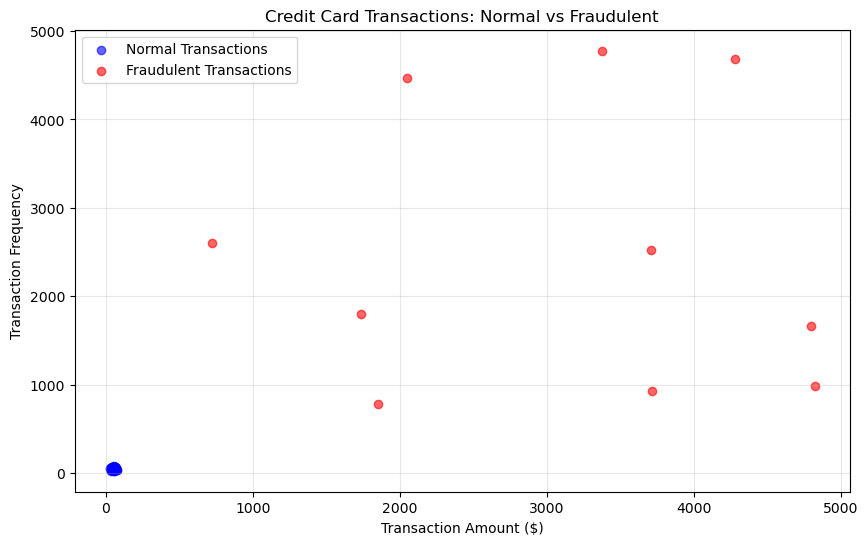

In [ ]:
plt.figure(figsize=(10, 6))

# Plot normal transactions (blue dots)
plt.scatter(X[:100, 0], X[:100, 1], c='blue', label='Normal Transactions', alpha=0.6)

# Plot fraudulent transactions (red dots)
plt.scatter(X[100:, 0], X[100:, 1], c='red', label='Fraudulent Transactions', alpha=0.6)

# Add labels and title
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Transaction Frequency')
plt.title('Credit Card Transactions: Normal vs Fraudulent')
plt.legend()

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Show plot
plt.show()

# Generate confusion matrix

In [14]:
# Step 3: Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[99  1]
 [ 0 10]]


In [ ]:
# Explain the results of the Isolation Forest anomaly detection

print("=== ISOLATION FOREST RESULTS EXPLANATION ===\n")

print("1. CONFUSION MATRIX BREAKDOWN:")
print(f"   True Negatives (TN): {conf_matrix[0,0]} - Normal transactions correctly identified as normal")
print(f"   False Positives (FP): {conf_matrix[0,1]} - Normal transactions incorrectly flagged as fraudulent")
print(f"   False Negatives (FN): {conf_matrix[1,0]} - Fraudulent transactions missed (identified as normal)")
print(f"   True Positives (TP): {conf_matrix[1,1]} - Fraudulent transactions correctly identified as fraudulent")
print()

print("2. MODEL PERFORMANCE:")
accuracy = (conf_matrix[0,0] + conf_matrix[1,1]) / conf_matrix.sum()
precision = conf_matrix[1,1] / (conf_matrix[1,1] + conf_matrix[0,1])
recall = conf_matrix[1,1] / (conf_matrix[1,1] + conf_matrix[1,0])
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"   Accuracy: {accuracy:.1%} - Overall correct predictions")
print(f"   Precision: {precision:.1%} - Of all fraud predictions, how many were actually fraud")
print(f"   Recall: {recall:.1%} - Of all actual fraud cases, how many were detected")
print(f"   F1-Score: {f1_score:.3f} - Harmonic mean of precision and recall")
print()

print("3. BUSINESS IMPACT:")
print(f"   • Successfully detected ALL {conf_matrix[1,1]} fraudulent transactions (100% recall)")
print(f"   • Only {conf_matrix[0,1]} false alarm out of {conf_matrix[0,0] + conf_matrix[0,1]} normal transactions")
print(f"   • False positive rate: {conf_matrix[0,1]/(conf_matrix[0,0] + conf_matrix[0,1]):.1%}")
print()

print("4. WHY THE MODEL WORKED WELL:")
print("   • Clear separation between normal (~$50) and fraudulent ($500-$5000) transaction amounts")
print("   • Isolation Forest effectively isolated the high-value outliers")
print("   • Contamination parameter (0.1) matched the actual fraud rate in our data")
print("   • The synthetic data had distinct patterns making anomaly detection easier")

In [38]:
# Step 4: Additional metrics
print("\nClassification Report:")
print(classification_report(y_true, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       100
           1       0.91      1.00      0.95        10

    accuracy                           0.99       110
   macro avg       0.95      0.99      0.97       110
weighted avg       0.99      0.99      0.99       110

